# Lifelines package Survival Analysis Demo

Resources:

* [Survival Analysis Curves, Cox Proportional Hazard Models, Kaplin-Meier Statistic](https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e)



Hazard function: instantaneous risk of failure (or event) for samples within the survival population up until point t given by:

    h(t) = [( S(t) -S(t + dt) )/dt] / S(t)

        OR 
    
    h(t) = f(t) / S(t)

        aka.
    
    h(t) = probability density function / survival function


# Kaplan-Meier Estimate

In the Mathematical formulation above we assumed the pdf function and thereby derived Survival function from the assumed pdf function. Since we don’t have the true survival curve of the population, thus we will estimate the survival curve from the data.
There are two main methods to estimate the survival curve. The ﬁrst method is a parametric approach. This method assumes a parametric model, which is based on certain distribution such as exponential distribution, then we estimate the parameter, and then finally form the estimator of the survival function. A second approach is a powerful non-parametric method called the Kaplan-Meier estimator. We will discuss it in this section. In this section we will also try to create the Kaplan-Meier curve manually as well as by using the Python library (lifelines).

Here, ni is deﬁned as the population at risk at time just prior to time ti; and di is defined as number of events occurred at time ti. This, will become more clear with the example below.
We will discuss an arbitrary example from a very small self created data, to understand the creation of Kaplan Meier Estimate curve, manually as well as using a python package.
Event, Time and Time Scale Definition for the Example:

The example below(Refer Fig 1) shows the data of 6 users of a website. These users visit the website and leaves that website after few minutes. Thus, event of interest is the time in which a user leaves the website. Time of origin is defined as the time of opening the website by a user and the time scale is in minutes. The study starts at time t=0 and ends at time t=6 minutes.

## Censorship:

Point worth noting here is that during the study period , event happened with 4 out of 6 users(shown in red), while two users (shown in green) continued and the event didn’t happened till the end of the study; such data is called the Censored data.
In case of censorship, as here in case of user 4 and user 5, we don’t know at what time the event will occur, but still we are using that data to estimate the probability of survival. If we choose not to include the censored data, then it is highly likely that our estimates would be highly biased and under-estimated. The inclusion of censored data to calculate the estimates, makes the Survival Analysis very powerful, and it stands out as compared to many other statistical techniques.
Calculations for KM Curve and the interpretation:

Now, lets talk about the calculations done to create the KM Curve below (Refer Fig 1). In figure 1, Kaplan Meier Estimate curve, x axis is the time of event and y axis is the estimated survival probability.

From t=0 till t<2.5 or t∈[0 , 2.5), number of users at risk(ni) at time t=0 is 6 and number of events occurred(di) at time t=0 is 0, therefore for all t in this interval, estimated S(t) = 1. From the definition of the event we can say that 100% is the probability that the time between a user opens the website and exit the website is greater than 2.499* minutes.

From t=2.5 till t<2.4 or t ∈ [2.5 , 4), number of users at risk(ni) at time just before time 2.5 minutes (2.4999* mins) is 6 and number of events occurred(di) at time t=2.5 minutes is 1, therefore therefore for all t in this interval, estimated S(t)= 0.83. From the definition of the event we can say that 83% is the probability that the time between a user opens the website and exit the website is greater than 3.999* minutes.

From t=4 till t<5 or t ∈[4 , 5), number of users at risk(ni) at time just before time 4 minutes (3.999* mins) is 5 and number of events occurred(di) at time t=4 minutes is 2, therefore for all t in this interval, estimated S(t) = 0.5. This result can also be verified by simple mathematics of relative frequency. For any t∈[4,5), lets say t=4.5, total number of users at the start were 6, total number remaining at t are 3. Therefore, the probability of the users spending more than 4.5 (or any time t ∈[4,5)) minutes on website is (3/6), which is 50%.

Similarly, we can estimate the probability for other time intervals (refer table calculations in fig 1)

Kaplin Meier Estimated Survival Function Figures:

![fig 1](https://miro.medium.com/max/786/1*NfYjSmifXEbLyb7XgZEaVA.png)

In [0]:
!pip install lifelines -qq

In [11]:
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.plotting import plot_lifetimes 
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


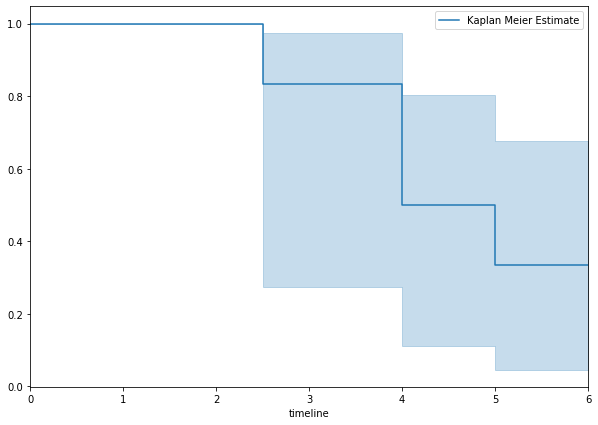

In [12]:
## Example Data 

fig, ax = plt.subplots(figsize=(10, 7))

durations = [5,6,6,2.5,4,4]
event_observed = [1, 0, 0, 1, 1, 1]

## create a kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot(ci_show=True, ax=ax) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.
plt.show()

## Real World Example - Customer Churn

As mentioned earlier that Survival Analysis can be used for the cohort analysis, to gain insights. So, here we will be using the Telco-Customer-Churn data set, to gain insight about the lifelines of customers in different cohorts.

In [0]:
FILENAME = '/content/drive/My Drive/datasets/Telco-Customer-Churn.csv'
df = pd.read_csv(FILENAME)

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
# Some preprocessing

df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
## Replace yes and No in the Churn column to 1 and 0. 1 for the event and 0 for the censured data.
df['Churn']=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

df.TotalCharges.fillna(value=df['TotalCharges'].median(),inplace=True)

# Create a list of Categorical Columns
cat_cols= [i  for i in df.columns if df[i].dtype==object]
cat_cols.remove('customerID')  ## customerID has been removed because it is unique for all the rows.

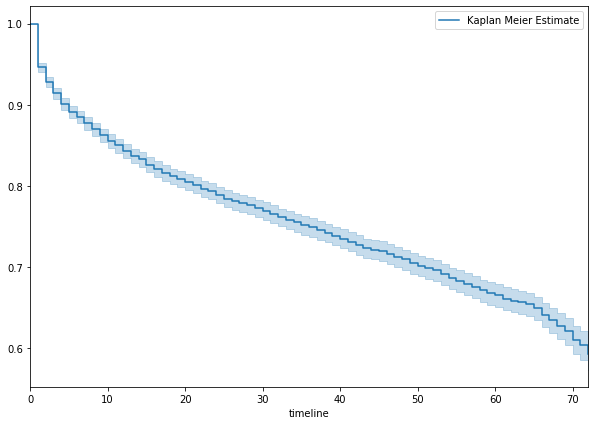

In [16]:
## Lets create an overall KaplanMeier curve, without breaking it into groups of covariates.

fig, ax = plt.subplots(figsize=(10, 7))

durations = df['tenure'] ## Time to event data of censored and event data
event_observed = df['Churn']  ## It has the churned (1) and censored is (0)

## create a kmf object as km
km = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the data into the model
km.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
km.plot(ax=ax)
plt.show()

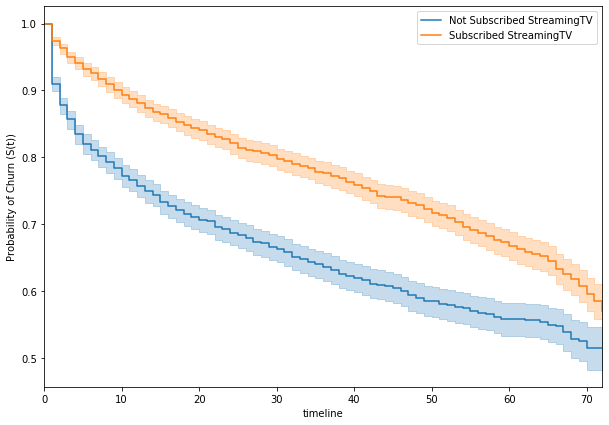

In [17]:
# Build Kaplan Meier Curves for Cohorts

fig, ax = plt.subplots(figsize=(10, 7))

kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

## Two Cohorts are compared. Cohort 1. Streaming TV Not Subscribed by users, and Cohort  2. Streaming TV subscribed by the users.
groups = df['StreamingTV']   
i1 = (groups == 'No')      ## group i1 , having the pandas series  for the 1st cohort
i2 = (groups == 'Yes')     ## group i2 , having the pandas series  for the 2nd cohort

T = df['tenure']     ## time to event
E = df['Churn']      ## event occurred or censored

## fit the model for 1st cohort
kmf1.fit(durations=T[i1], event_observed=E[i1], label='Not Subscribed StreamingTV')
kmf1.plot(ci_show=True, ax=ax)

## fit the model for 2nd cohort
kmf1.fit(durations=T[i2], event_observed=E[i2], label='Subscribed StreamingTV')
kmf1.plot(ci_show=True, ax=ax)

ax.set_ylabel("Probability of Churn (S(t))")
plt.show()

We have two survival curves , one for each cohort. From the curves, it is evident that the customers, who have subscribed for the Streaming TV, have better customer retention as compared to the customers, who have not subscribed for the Streaming TV. At any point t across the timeline, we can see that the survival probability of the cohort in blue is less than the cohort in red. For the cohort in blue, the survival probability is decreasing with high rate in first 10 months and it gets relatively better after that; however, for the red cohort, the rate of decrease in survival rate is fairly constant. Therefore, for the cohort , which has not subscribed for the Streaming TV, efforts should be made to retain the customers in first 10 volatile months.

We can do more such cohort analysis from the survival curves of the different cohorts. This cohort analysis represents the limited use case of the potential of the survival analysis because we are using it for the aggregated level of the data. We can create the Survival Curves for even the individual users based on the effects of covariates on the baseline Survival Curves.

# Cox Proportional Hazard Model

The time to event for an individual in the population is very important for the survival curves at the aggregate level; however, in real life situations along with the event data we also have the covariates (features) of that individual. In such cases, it is very important to know about the impact of covariates on the survival curve. This would help us in predicting the survival probability of an individual, if we know the associated covariates values.

In [19]:
## My objective here is to introduce you to the implementation of the model.Thus taking subset of the columns to train the model.
## Only using the subset of the columns present in the original data
features_of_interest = ['tenure', 'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService','MonthlyCharges','SeniorCitizen','StreamingTV']
df_r= df.loc[:, features_of_interest]
df_r.head() ## have a look at the data

,tenure,Churn,gender,Partner,Dependents,PhoneService,MonthlyCharges,SeniorCitizen,StreamingTV
0,1,0,Female,Yes,No,No,29.85,0,No
1,34,0,Male,No,No,Yes,56.95,0,No
2,2,1,Male,No,No,Yes,53.85,0,No
3,45,0,Male,No,No,No,42.30,0,No
4,2,1,Female,No,No,Yes,70.70,0,No


In [20]:
# get dummies
df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()

,tenure,Churn,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
0,1,0,29.85,0,0,1,0,0,0,0
1,34,0,56.95,0,1,0,0,1,0,0
2,2,1,53.85,0,1,0,0,1,0,0
3,45,0,42.30,0,1,0,0,0,0,0
4,2,1,70.70,0,0,0,0,1,0,0


In [21]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_dummy, 'tenure', event_col='Churn')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

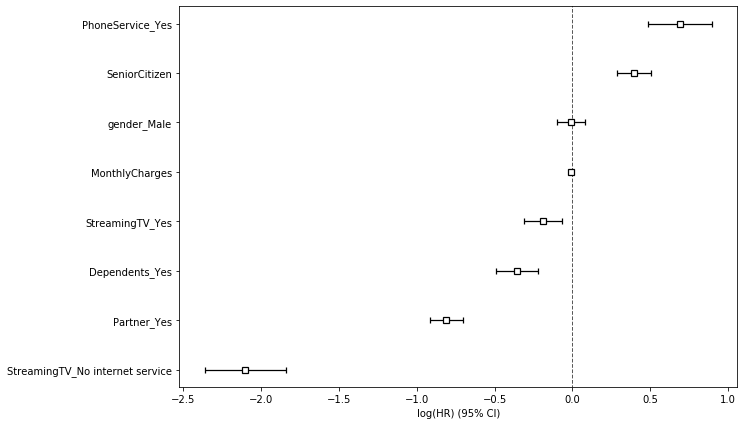

In [24]:
fig, ax = plt.subplots(figsize=(10, 7))
cph.plot(ax=ax)
plt.show()

The summary statistics above indicates the significance of the covariates in predicting the churn risk. Gender doesn’t play any significant role in predicting the churn, whereas all the other covariates are significant.

Interesting point to note here is that , the β (coef ) values in case of covariates MonthlyCharges and gender_Male is approximately zero (~-0.01), but still the MonthlyCharges plays a significant role in predicting churn , while the latter is insignificant. The reason is that the MonthlyCharges is continuous value and it can vary from the order of tens, hundreds to thousands, when multiplied by the small coef (β=-0.01), it becomes significant. On the other hand, the covariate gender can only take the value 0 or 1, and in both the cases [exp(-0.01 * 0), exp(-0.01*1)] it will be insignificant.

In [25]:
## We want to see the Survival curve at the customer level. Therefore, we have selected 6 customers (rows 5 till 9).
tr_rows = df_dummy.iloc[5:10, 2:]
tr_rows

,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
5,99.65,0,0,0,0,1,0,1
6,89.10,0,1,0,1,1,0,1
7,29.75,0,0,0,0,0,0,0
8,104.80,0,0,1,0,1,0,1
9,56.15,0,1,0,1,1,0,0


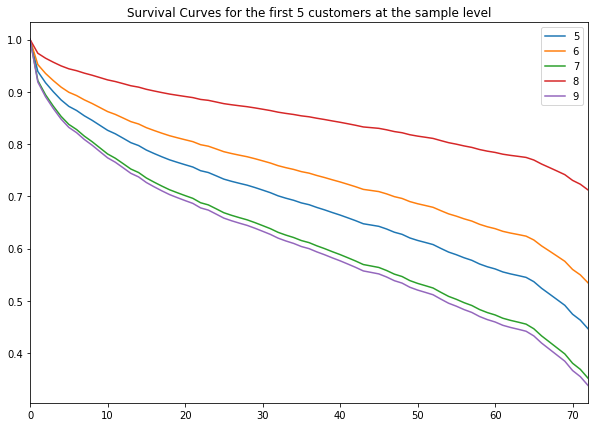

In [28]:
fig, ax = plt.subplots(figsize=(10, 7))
cph.predict_survival_function(tr_rows).plot(ax=ax)
plt.title("Survival Curves for the first 5 customers at the sample level")
plt.show()

The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.





1. Variable 'MonthlyCharges' failed the non-proportional test: p-value is <5e-05.

   Advice 1: the functional form of the variable 'MonthlyCharges' might be incorrect. That is, there
may be non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
functional forms. See documentation in link [D] below on how to specify a functional form.

   Advice 2: try binning the variable 'MonthlyCharges' using pd.cut, and then specify it in
`strata=['MonthlyCharges', ...]` in the call in `.fit`. See documentation in link [B] below.

   Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
below.


2. Variable 'Partner_Yes' failed the non-proportional test: p-value is <5e-05.

   Advice: with so few unique values (only 2), you can include `strata=['Partner_Yes', ...]` in the
call in `.fit`. See documentation in link [E] below.

3. Variable 'PhoneService_Yes' failed the non-proportional test: p-value is 0.0071.

   Advice: 

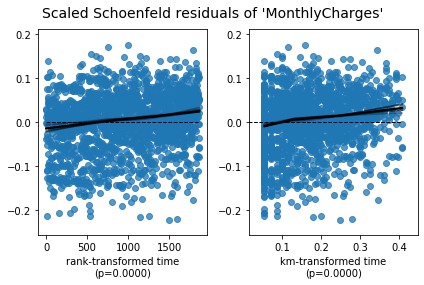

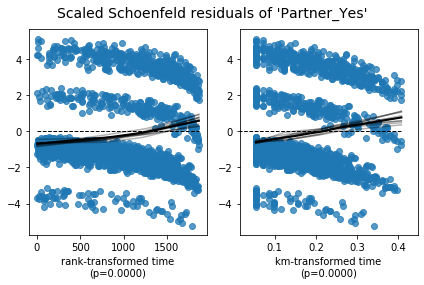

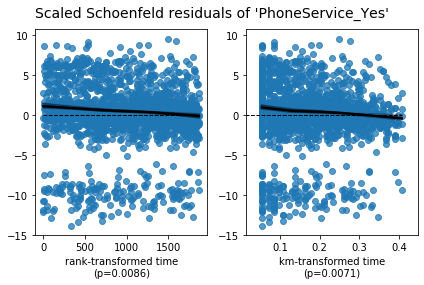

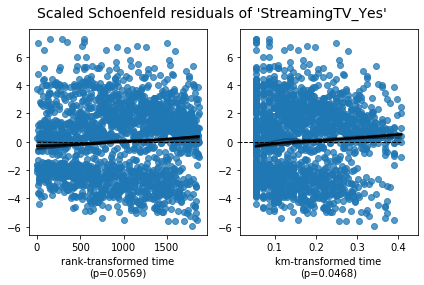

In [38]:
cph.check_assumptions(training_df=df_dummy, advice=True, show_plots=True, p_value_threshold=0.05)

Creating the survival curves at each customer level helps us in proactively creating a tailor made strategy for high-valued customers for different survival risk segments along the timeline.

Though, there are many other things which are still remaining to be covered in survival analysis such as ‘checking proportionality assumption’, & ‘model selection’ ; however, with a basic understanding of the mathematics behind the analysis, and the basic implementation of the survival analysis (using the lifelines package in python) will help us in implementing this model in any pertinent business use case.